Load in libraries

In [11]:
import pandas as pd
from pandas import concat
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

Read in data

In [3]:
xlsCH4 = pd.ExcelFile('GBR_2022_2020_10052022_142545.xlsx')
dfCH4 = pd.read_excel(xlsCH4, 'Table10s3', header=4)
dfCH4.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfCH4.dropna(inplace=True)
#dfCH4

Remove NaNs

In [4]:
dfCH4.drop(
    labels = ["D.  Non-energy products from fuels and solvent use", "G.  Other product manufacture and use ", "C.  Rice cultivation", "D.  Agricultural soils", "E.  Prescribed burning of savannas", "F.  Other land", "E.  Other ","6.  Other (as specified in summary 1.A)", "International bunkers", "Navigation", "Multilateral operations",
 "Aviation"],
    axis=0,
    inplace = True
)
dfCH4.drop(
    labels = ["Base year(1)", "Change from base to latest reported year"],
    axis=1,
    inplace = True
)
dfCH4

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GREENHOUSE GAS SOURCE AND SINK CATEGORIES,,,,,,,,,,,,,,,,,,,,,
1. Energy,1496.198346,1516.883409,1498.019022,1420.993629,1120.636638,1154.969761,1092.643012,1006.961661,912.736797,807.442782,...,387.160409,384.369606,337.847767,320.953039,303.773576,265.857528,263.057614,262.56135,253.997777,235.556764
A. Fuel combustion (sectoral approach),129.43946,134.46966,127.281609,130.133233,118.014832,102.281655,102.989162,95.268341,87.501802,89.806013,...,43.511694,43.364553,44.386653,43.105705,45.153607,46.465766,47.673054,49.478277,49.131183,48.218358
1. Energy industries,9.327453,9.296994,9.501829,9.922269,10.060215,10.488551,10.775702,11.090562,7.958353,12.192445,...,11.704258,11.252326,11.241765,12.737843,13.304238,14.164167,14.788899,15.170421,15.508386,15.282
2. Manufacturing industries and construction,4.589083,4.711231,4.728609,4.377738,4.663597,4.541524,4.210813,3.877838,3.823551,3.767527,...,3.576307,3.38953,3.569429,4.073298,4.273278,4.37072,4.833171,5.192234,5.1501,5.366701
3. Transport,50.681303,50.103597,49.49165,47.311956,43.707487,40.099872,38.641082,35.893641,32.735081,30.344558,...,6.78282,6.061676,5.406256,5.031123,4.683222,4.395497,4.170461,3.983555,3.90597,3.068721
4. Other sectors,64.69936,70.249412,63.455389,68.412059,59.478312,47.04932,49.262109,44.314246,42.899231,43.419329,...,21.376114,22.59465,24.109167,21.210039,22.848633,23.494567,23.839137,25.090262,24.522814,24.463595
5. Other,0.142261,0.108426,0.104131,0.109211,0.105221,0.102388,0.099455,0.092053,0.085586,0.082154,...,0.072195,0.06637,0.060035,0.053402,0.044236,0.040815,0.041386,0.041804,0.043913,0.037341
B. Fugitive emissions from fuels,1366.758886,1382.413749,1370.737413,1290.860396,1002.621807,1052.688107,989.65385,911.69332,825.234995,717.636768,...,343.648715,341.005053,293.461115,277.847333,258.619969,219.391762,215.38456,213.083073,204.866594,187.338406
1. Solid fuels,873.074293,897.83253,890.364618,829.103641,550.959869,602.516256,557.611234,534.514975,455.335515,377.117508,...,97.976567,98.672825,68.181055,67.278929,55.380997,20.262999,19.510771,18.825045,19.558908,18.98806


Plot annual methane emmissions by sector

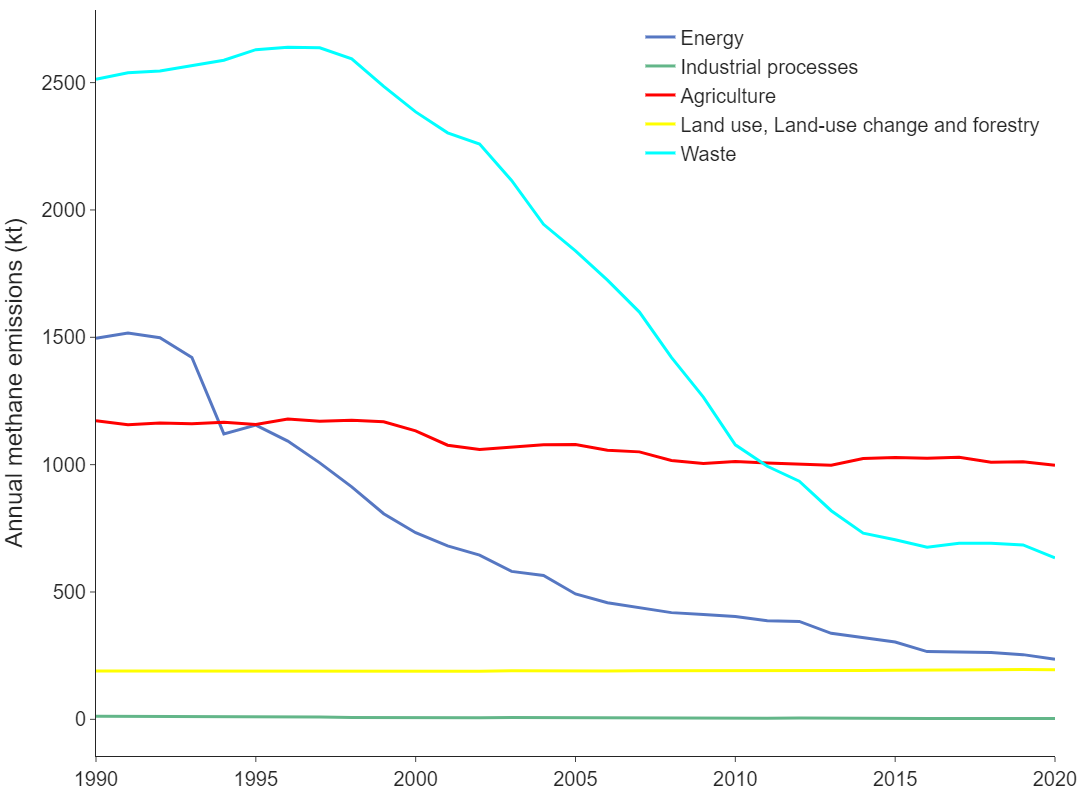

In [36]:
fig = go.Figure()

alpha = 0.6
color_1 = ["rgba(86, 119, 194, 1)", f"rgba(86, 119, 194, {alpha})"]
color_2 = ["rgba(99, 182, 137, 1)", f"rgba(99, 182, 137, {alpha})"]
color_3 = ["rgba(255, 0, 0, 1)", f"rgba(255, 0, 0, {alpha})"]
color_4 = ["rgba(255, 255, 0, 1)", f"rgba(255, 255, 0, {alpha})"]
color_5 = ["rgba(0, 255, 255, 1)", f"rgba(0, 255, 255, {alpha})"]

date_range = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
#date_range = ["2019-03-01", "2019-06-01"]

fig.add_trace(go.Scatter(
    x=date_range,
    y=dfCH4.loc["1. Energy"],
    mode='lines',
    line=dict(color=color_1[0], width=3.),
    showlegend=True,
    name="Energy",
    ))

fig.add_trace(go.Scatter(
    x=date_range,
    y=dfCH4.loc["2.  Industrial processes"],
    mode='lines',
    line=dict(color=color_2[0], width=3.),
    showlegend=True,
    name="Industrial processes",
    ))

fig.add_trace(go.Scatter(
    x=date_range,
    y=dfCH4.loc["3.  Agriculture"],
    mode='lines',
    line=dict(color=color_3[0], width=3.),
    showlegend=True,
    name="Agriculture",
    ))

fig.add_trace(go.Scatter(
    x=date_range,
    y=dfCH4.loc["4. Land use, land-use change and forestry"],
    mode='lines',
    line=dict(color=color_4[0], width=3.),
    showlegend=True,
    name="Land use, Land-use change and forestry",
    ))

fig.add_trace(go.Scatter(
    x=date_range,
    y=dfCH4.loc["5.  Waste"],
    mode='lines',
    line=dict(color=color_5[0], width=3.),
    showlegend=True,
    name="Waste",
    ))

fig.update_layout(
    yaxis_title="Annual methane emissions (kt)",
    template="simple_white",
    autosize=False,
    width=550*2,
    height=400*2,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99,
        traceorder="normal"),
    margin=dict(l=55, r=10, t=10, b=40),
    # paper_bgcolor='rgba(0,0,0,0)',
    # plot_bgcolor='rgba(0,0,0,0)'
)


fig.layout.font.size=20
fig.layout.font.family="Arial"

fig.write_image("Annual_methane_emissions_by_sector.png")

fig.show()

Methane emissions by sector 2020

In [57]:
dfCH4_2020 = dfCH4["2020"]
dfCH4_2020_C = pd.to_numeric(dfCH4_2020, errors = 'coerce')
dfCH4_2020_C.dropna(inplace=True)
dfCH4_2020_C

GREENHOUSE GAS SOURCE AND SINK CATEGORIES
1. Energy                                                              235.556764
A. Fuel combustion (sectoral approach)                                  48.218358
1.  Energy industries                                                   15.282000
2.  Manufacturing industries and construction                            5.366701
3.  Transport                                                            3.068721
4.  Other sectors                                                       24.463595
5.  Other                                                                0.037341
B. Fugitive emissions from fuels                                       187.338406
1.  Solid fuels                                                         18.988060
2.  Oil and natural gas and other emissions from energy production     168.350346
2.  Industrial processes                                                 3.230295
B.  Chemical industry                                   

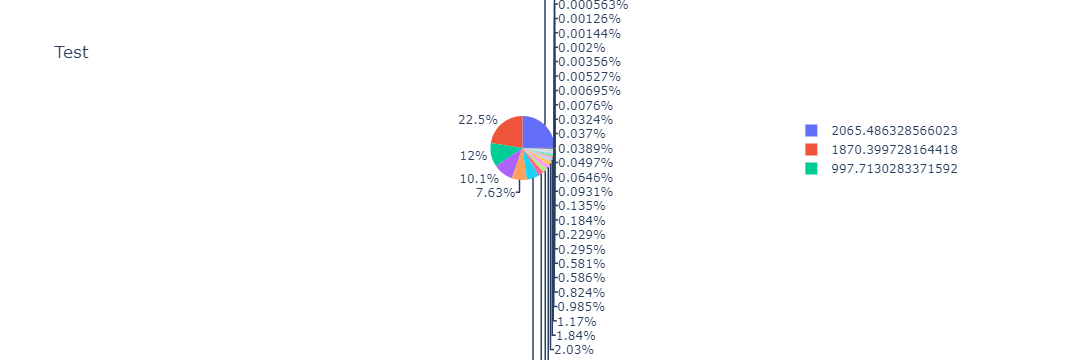

In [66]:
#fig = px.pie(dfCH4_2020_C, values='2020', names='2020', title='Test')
#fig.show()

Read in N2O data

In [55]:
xlsN2O = pd.ExcelFile('GBR_2022_2020_10052022_142545.xlsx')
dfN2O = pd.read_excel(xlsN2O, 'Table10s4', header=4)
dfN2O.set_index("GREENHOUSE GAS SOURCE AND SINK CATEGORIES", inplace=True)
dfN2O.dropna(inplace=True)
dfN2O

,Base year(1),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Change from base to latest reported year
GREENHOUSE GAS SOURCE AND SINK CATEGORIES,,,,,,,,,,,,,,,,,,,,,
1. Energy,12.399834,12.399834,12.32051,12.126234,12.005137,12.267934,12.600877,12.107575,11.725449,11.806042,...,8.71365,8.628428,8.386046,8.46204,7.961422,7.92665,8.042293,7.921735,7.227956,-41.709255
A. Fuel combustion (sectoral approach),12.249575,12.249575,12.174791,11.978783,11.850275,12.075453,12.397266,11.899059,11.539965,11.616474,...,8.58924,8.510284,8.268197,8.342556,7.838041,7.802034,7.916938,7.797677,7.124227,-41.841029
1. Energy industries,4.821621,4.821621,4.773376,4.616961,4.171165,4.055918,3.990189,3.837661,3.603327,3.787902,...,3.835712,3.716935,3.326995,3.210666,2.553062,2.390532,2.417321,2.39708,2.352618,-51.206911
2. Manufacturing industries and construction,1.058335,1.058335,1.052081,1.042331,1.008378,1.046156,1.009588,0.97332,0.921806,0.910577,...,0.690587,0.63024,0.700639,0.748686,0.754312,0.826021,0.880824,0.837112,0.841022,-20.533441
3. Transport,4.840101,4.840101,4.765728,4.850607,5.13147,5.58361,6.199382,5.847695,5.859706,5.814485,...,3.358268,3.450058,3.581472,3.71373,3.851384,3.905597,3.919561,3.874779,3.259928,-32.647512
4. Other sectors,1.341185,1.341185,1.425898,1.319323,1.390179,1.247737,1.058127,1.102795,1.022007,0.989463,...,0.613861,0.630683,0.586724,0.610692,0.624341,0.623374,0.641296,0.626865,0.621023,-53.695971
5. Other,0.188334,0.188334,0.157709,0.14956,0.149084,0.142032,0.139979,0.137589,0.133119,0.114047,...,0.090812,0.082368,0.072368,0.058783,0.054942,0.05651,0.057936,0.061841,0.049636,-73.644755
B. Fugitive emissions from fuels,0.150259,0.150259,0.145718,0.147451,0.154863,0.192481,0.203611,0.208516,0.185483,0.189568,...,0.12441,0.118145,0.117849,0.119484,0.123381,0.124616,0.125354,0.124058,0.103729,-30.966605
1. Solid fuels,0.000303,0.000303,0.000123,0.000088,0.00015,0.000087,0.000098,0.000096,0.000065,0.000109,...,0.000062,0.000126,0.000221,0.000249,0.000066,0.000059,0.000039,0.000052,0.000055,-81.860814
